In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**LOAD DATASET**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


**VERIFY THE DATA**

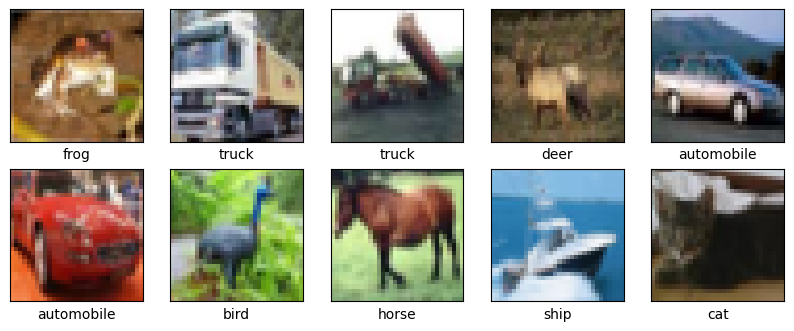

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**CREATE CONVOLUTIONAL LAYERS**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [ ]:
#MORE DENSE LAYER
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

**COMPILE AND TRAIN**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 0.2045 - accuracy: 0.9263 - val_loss: 1.8665 - val_accuracy: 0.6752
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1836 - accuracy: 0.9332 - val_loss: 1.8633 - val_accuracy: 0.6765
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1837 - accuracy: 0.9330 - val_loss: 1.9169 - val_accuracy: 0.6709
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1783 - accuracy: 0.9359 - val_loss: 1.9287 - val_accuracy: 0.6723
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1690 - accuracy: 0.9396 - val_loss: 2.0389 - val_accuracy: 0.6715
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1711 - accuracy: 0.9390 - val_loss: 2.0277 - val_accuracy: 0.6790
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1624 - accuracy: 0.9434 - val_loss: 2.1253 - val_accuracy

**EVALUATE THE MODEL**

313/313 - 1s - loss: 2.2764 - accuracy: 0.6691 - 956ms/epoch - 3ms/step


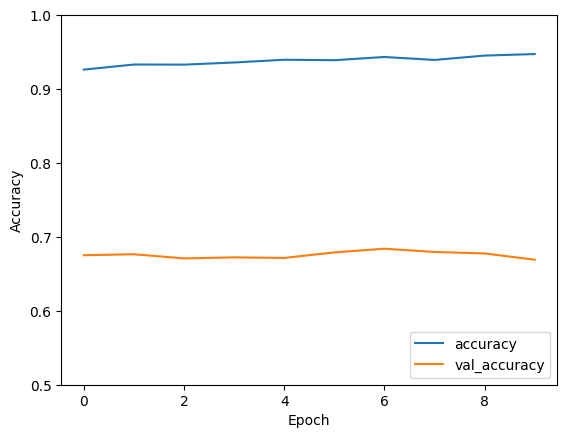

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc*100)

66.90999865531921


313/313 [==============================] - 1s 3ms/step


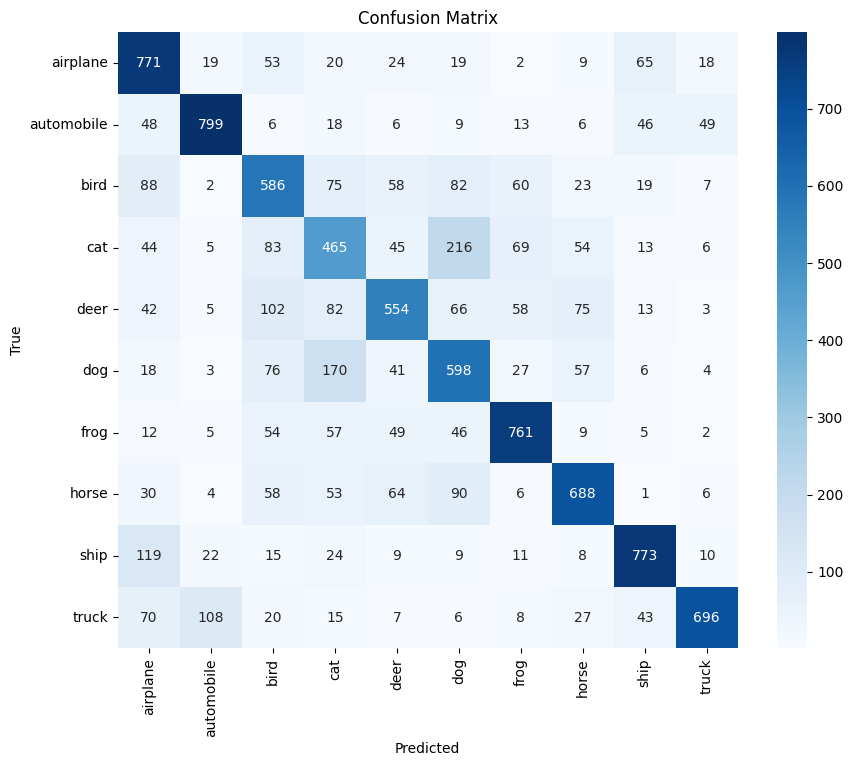

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**TEST FOR AN IMAGE**

In [ ]:
from google.colab import files

# Upload an image file
uploaded = files.upload()

# Assuming you uploaded a single image, get its file name
image_path = list(uploaded.keys())[0]


Saving colab3_img.jpg to colab3_img (1).jpg


1/1 [==============================] - 0s 17ms/step


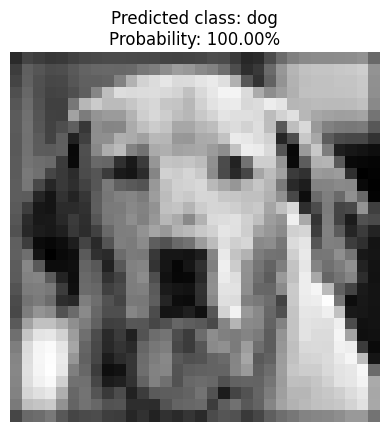

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.applications.resnet50 import preprocess_input  # Adjust this based on your model architecture

# Load the uploaded image
image = Image.open(image_path)

# Preprocess the image
input_shape = (32, 32)  # Change this to match your model's input shape
image = image.resize(input_shape)
image_array = keras_image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
processed_image = preprocess_input(image_array)

# Make predictions
predictions = model.predict(processed_image)
probabilities = tf.nn.softmax(predictions[0])
predicted_class = np.argmax(probabilities)

# Assuming you have the class_names list defined
predicted_class_name = class_names[predicted_class]

# Display the Result and Image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.title(f'Predicted class: {predicted_class_name}\nProbability: {probabilities[predicted_class]:.2%}')
plt.show()
